In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, stddev, min, max, expr
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder.appName("BigData Hotel").getOrCreate()
spark

In [3]:
# Đọc dữ liệu vào dataframe
df = spark.read.csv('Hotel Reservations.csv', header=True, inferSchema=True)
df.show()

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

**Phân tích dữ liệu**

In [ ]:
# Mô tả các thành phần dữ liệu
description = df.describe()
description.show()

+-------+----------+------------------+-------------------+--------------------+------------------+-----------------+--------------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+-------------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|summary|Booking_ID|      no_of_adults|     no_of_children|no_of_weekend_nights| no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|        lead_time|      arrival_year|     arrival_month|      arrival_date|market_segment_type|     repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+-------+----------+------------------+-------------------+--------------------+------------------+-----------------+--------------------------+------------------+-----------------+---------------

In [ ]:
df.printSchema()

root
 |-- Booking_ID: string (nullable = true)
 |-- no_of_adults: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- no_of_weekend_nights: integer (nullable = true)
 |-- no_of_week_nights: integer (nullable = true)
 |-- type_of_meal_plan: string (nullable = true)
 |-- required_car_parking_space: integer (nullable = true)
 |-- room_type_reserved: string (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- repeated_guest: integer (nullable = true)
 |-- no_of_previous_cancellations: integer (nullable = true)
 |-- no_of_previous_bookings_not_canceled: integer (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- no_of_special_requests: integer (nullable = true)
 |-- booking_status: string (nullable = true)



In [ ]:
# Tính toán giá trị cao nhất và thấp nhất cho từng cột số
min_values = df.select([min(col(c)).alias(c) for c in df.columns if df.schema[c].dataType.typeName() in ['integer', 'double']])
max_values = df.select([max(col(c)).alias(c) for c in df.columns if df.schema[c].dataType.typeName() in ['integer', 'double']])

print('Giá trị lớn nhất:')
max_values.show()
print('Giá trị nhỏ nhất:')
min_values.show()

Giá trị lớn nhất:
+------------+--------------+--------------------+-----------------+--------------------------+---------+------------+-------------+------------+--------------+----------------------------+------------------------------------+------------------+----------------------+
|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|required_car_parking_space|lead_time|arrival_year|arrival_month|arrival_date|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|
+------------+--------------+--------------------+-----------------+--------------------------+---------+------------+-------------+------------+--------------+----------------------------+------------------------------------+------------------+----------------------+
|           4|            10|                   7|               17|                         1|      443|        2018|           12|          31|             1|               

In [ ]:
# Tính giá trị trung bình
mean_values = df.select([mean(col(c)).alias(f"{c}_mean") for c in df.columns if df.schema[c].dataType.typeName() in ['integer', 'double']])
mean_values.show()

+------------------+-------------------+-------------------------+----------------------+-------------------------------+-----------------+------------------+------------------+------------------+-------------------+---------------------------------+-----------------------------------------+-----------------------+---------------------------+
| no_of_adults_mean|no_of_children_mean|no_of_weekend_nights_mean|no_of_week_nights_mean|required_car_parking_space_mean|   lead_time_mean| arrival_year_mean|arrival_month_mean| arrival_date_mean|repeated_guest_mean|no_of_previous_cancellations_mean|no_of_previous_bookings_not_canceled_mean|avg_price_per_room_mean|no_of_special_requests_mean|
+------------------+-------------------+-------------------------+----------------------+-------------------------------+-----------------+------------------+------------------+------------------+-------------------+---------------------------------+-----------------------------------------+------------------

In [ ]:
# Tính độ lệch chuẩn
stddev_values = df.select([stddev(col(c)).alias(f"{c}_stddev") for c in df.columns if df.schema[c].dataType.typeName() in ['integer', 'double']])
stddev_values.show()

+-------------------+---------------------+---------------------------+------------------------+---------------------------------+-----------------+-------------------+--------------------+-------------------+---------------------+-----------------------------------+-------------------------------------------+-------------------------+-----------------------------+
|no_of_adults_stddev|no_of_children_stddev|no_of_weekend_nights_stddev|no_of_week_nights_stddev|required_car_parking_space_stddev| lead_time_stddev|arrival_year_stddev|arrival_month_stddev|arrival_date_stddev|repeated_guest_stddev|no_of_previous_cancellations_stddev|no_of_previous_bookings_not_canceled_stddev|avg_price_per_room_stddev|no_of_special_requests_stddev|
+-------------------+---------------------+---------------------------+------------------------+---------------------------------+-----------------+-------------------+--------------------+-------------------+---------------------+---------------------------------

In [ ]:
# Tính giá trị trung vị (median) cho các cột số
median_values = {}
for c in df.columns:
    if df.schema[c].dataType.typeName() in ['integer', 'double']:
        median_values[c] = df.approxQuantile(c, [0.5], 0.01)[0]

for c, median in median_values.items():
    print(f"Giá trị trung vị của {c}: {median}")

Giá trị trung vị của no_of_adults: 2.0
Giá trị trung vị của no_of_children: 0.0
Giá trị trung vị của no_of_weekend_nights: 1.0
Giá trị trung vị của no_of_week_nights: 2.0
Giá trị trung vị của required_car_parking_space: 0.0
Giá trị trung vị của lead_time: 57.0
Giá trị trung vị của arrival_year: 2018.0
Giá trị trung vị của arrival_month: 8.0
Giá trị trung vị của arrival_date: 15.0
Giá trị trung vị của repeated_guest: 0.0
Giá trị trung vị của no_of_previous_cancellations: 0.0
Giá trị trung vị của no_of_previous_bookings_not_canceled: 0.0
Giá trị trung vị của avg_price_per_room: 99.45
Giá trị trung vị của no_of_special_requests: 0.0


In [ ]:
# Tính toán giá trị phổ biến nhất (mode)
mode_values = {}
for c in df.columns:
    if df.schema[c].dataType.typeName() in ['integer', 'double', 'string']:
        mode_values[c] = df.groupBy(c).agg(count("*").alias("count")).orderBy(col("count").desc()).first()

for c, mode in mode_values.items():
    print(f"Giá trị phổ biến nhất của {c}: {mode[0]} với số lần: {mode[1]}")

Giá trị phổ biến nhất của Booking_ID: INN00413 với số lần: 1
Giá trị phổ biến nhất của no_of_adults: 2 với số lần: 26108
Giá trị phổ biến nhất của no_of_children: 0 với số lần: 33577
Giá trị phổ biến nhất của no_of_weekend_nights: 0 với số lần: 16872
Giá trị phổ biến nhất của no_of_week_nights: 2 với số lần: 11444
Giá trị phổ biến nhất của type_of_meal_plan: Meal Plan 1 với số lần: 27835
Giá trị phổ biến nhất của required_car_parking_space: 0 với số lần: 35151
Giá trị phổ biến nhất của room_type_reserved: Room_Type 1 với số lần: 28130
Giá trị phổ biến nhất của lead_time: 0 với số lần: 1297
Giá trị phổ biến nhất của arrival_year: 2018 với số lần: 29761
Giá trị phổ biến nhất của arrival_month: 10 với số lần: 5317
Giá trị phổ biến nhất của arrival_date: 13 với số lần: 1358
Giá trị phổ biến nhất của market_segment_type: Online với số lần: 23214
Giá trị phổ biến nhất của repeated_guest: 0 với số lần: 35345
Giá trị phổ biến nhất của no_of_previous_cancellations: 0 với số lần: 35937
Giá trị p

In [4]:
# Tính toán giá trị hiếm nhất
rare_values = {}

# Lặp qua các cột trong DataFrame
for c in df.columns:
    if df.schema[c].dataType.typeName() in ["integer", "double", "string"]:
        # Tính toán số lần xuất hiện của mỗi giá trị
        value_counts = df.groupBy(c).agg(count("*").alias("count"))

        # Tìm giá trị hiếm nhất
        rare_value = value_counts.orderBy(col("count").asc()).first()

        # Lưu vào từ điển
        rare_values[c] = rare_value

# In ra giá trị hiếm nhất
for c, rare in rare_values.items():
    print(f"Giá trị hiếm nhất của cột {c}: {rare[0]} với số lần: {rare[1]}")

Giá trị hiếm nhất của cột Booking_ID: INN00413 với số lần: 1
Giá trị hiếm nhất của cột no_of_adults: 4 với số lần: 16
Giá trị hiếm nhất của cột no_of_children: 10 với số lần: 1
Giá trị hiếm nhất của cột no_of_weekend_nights: 7 với số lần: 1
Giá trị hiếm nhất của cột no_of_week_nights: 16 với số lần: 2
Giá trị hiếm nhất của cột type_of_meal_plan: Meal Plan 3 với số lần: 5
Giá trị hiếm nhất của cột required_car_parking_space: 1 với số lần: 1124
Giá trị hiếm nhất của cột room_type_reserved: Room_Type 3 với số lần: 7
Giá trị hiếm nhất của cột lead_time: 300 với số lần: 1
Giá trị hiếm nhất của cột arrival_year: 2017 với số lần: 6514
Giá trị hiếm nhất của cột arrival_month: 1 với số lần: 1014
Giá trị hiếm nhất của cột arrival_date: 31 với số lần: 578
Giá trị hiếm nhất của cột market_segment_type: Aviation với số lần: 125
Giá trị hiếm nhất của cột repeated_guest: 1 với số lần: 930
Giá trị hiếm nhất của cột no_of_previous_cancellations: 6 với số lần: 1
Giá trị hiếm nhất của cột no_of_previous_

**Trực quan dữ liệu**

<ipython-input-31-2de88ab0f4f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='booking_status', palette='Set2')


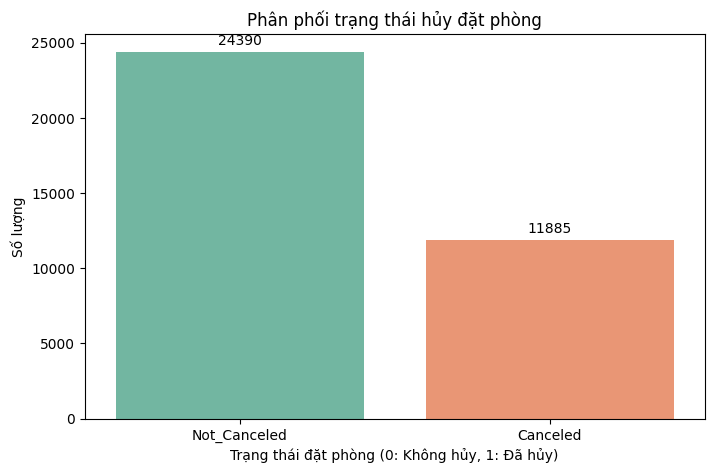

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi một phần dữ liệu từ Spark DataFrame sang Pandas DataFrame để trực quan hóa
data = df.toPandas()

# Phân phối trạng thái hủy đặt phòng
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='booking_status', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Phân phối trạng thái hủy đặt phòng')
plt.xlabel('Trạng thái đặt phòng (0: Không hủy, 1: Đã hủy)')
plt.ylabel('Số lượng')
plt.show()

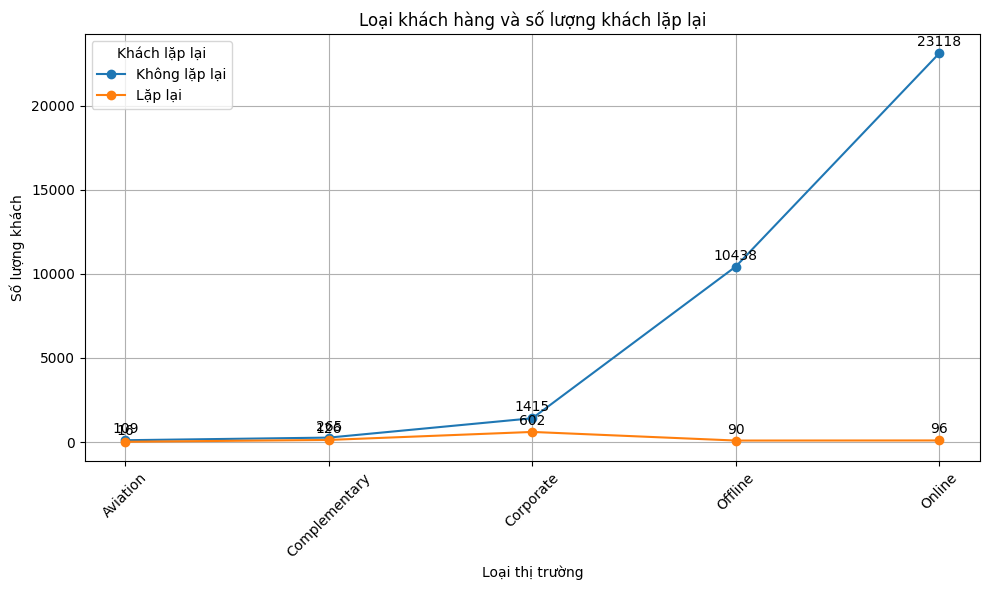

In [ ]:
# Tính toán số lượng khách lặp lại theo loại thị trường
repeated_guest_data = data.groupby(['market_segment_type', 'repeated_guest']).size().unstack().fillna(0)

# Trực quan hóa
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ đường cho mỗi loại khách
for guest_type in repeated_guest_data.columns:
    plt.plot(repeated_guest_data.index, repeated_guest_data[guest_type], marker='o', label='Lặp lại' if guest_type else 'Không lặp lại')

# Thêm nhãn dữ liệu cho từng điểm
for i in range(len(repeated_guest_data)):
    for j in range(len(repeated_guest_data.columns)):
        plt.annotate(f'{int(repeated_guest_data.iloc[i, j])}',
                     (i, repeated_guest_data.iloc[i, j]),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

plt.title('Loại khách hàng và số lượng khách lặp lại')
plt.xlabel('Loại thị trường')
plt.ylabel('Số lượng khách')
plt.xticks(rotation=45)
plt.legend(title='Khách lặp lại')
plt.grid(True)
plt.tight_layout()  # Đảm bảo không có phần nào bị cắt
plt.show()

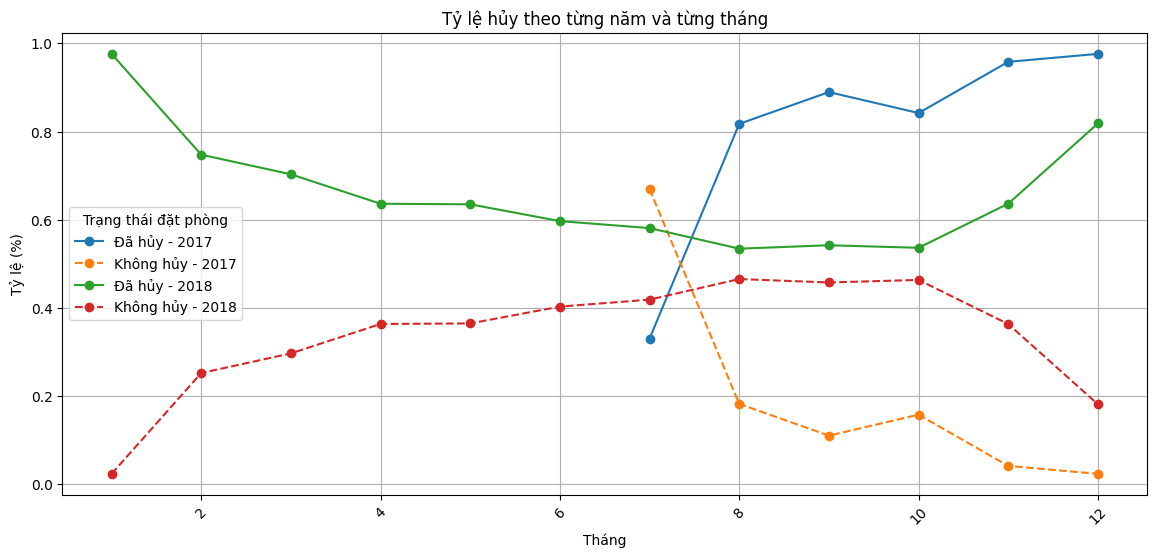

In [ ]:
# Trực quan hóa tỷ lệ hủy theo năm và tháng với biểu đồ đường
plt.figure(figsize=(14, 6))

for year in year_month_cancellation['arrival_year'].unique():
    data_year = year_month_cancellation[year_month_cancellation['arrival_year'] == year]
    plt.plot(data_year['arrival_month'], data_year['Đã hủy'], marker='o', label=f'Đã hủy - {year}')
    plt.plot(data_year['arrival_month'], data_year['Không hủy'], marker='o', label=f'Không hủy - {year}', linestyle='--')

plt.title('Tỷ lệ hủy theo từng năm và từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)
plt.legend(title='Trạng thái đặt phòng')
plt.grid()
plt.show()

<ipython-input-43-5970b731c814>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=special_requests_cancellation, x='no_of_special_requests', y='Đã hủy', palette='coolwarm')


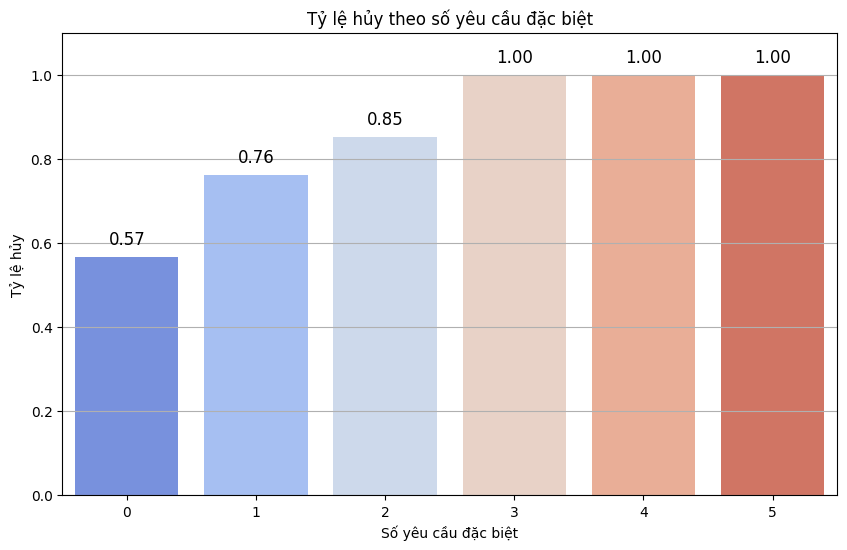

In [ ]:
# Tính toán tỷ lệ hủy theo số yêu cầu đặc biệt
special_requests_cancellation = data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack().fillna(0)
special_requests_cancellation.columns = ['Không hủy', 'Đã hủy']
special_requests_cancellation = special_requests_cancellation.reset_index()

# Trực quan hóa
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=special_requests_cancellation, x='no_of_special_requests', y='Đã hủy', palette='coolwarm')

# Thêm nhãn dữ liệu
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height + 0.02),  # Điều chỉnh vị trí
                      ha='center', va='bottom', fontsize=12)

plt.title('Tỷ lệ hủy theo số yêu cầu đặc biệt')
plt.xlabel('Số yêu cầu đặc biệt')
plt.ylabel('Tỷ lệ hủy')
plt.ylim(0, 1.1)  # Giới hạn trục y từ 0 đến 1.1 để có thêm không gian cho nhãn
plt.grid(axis='y')
plt.show()

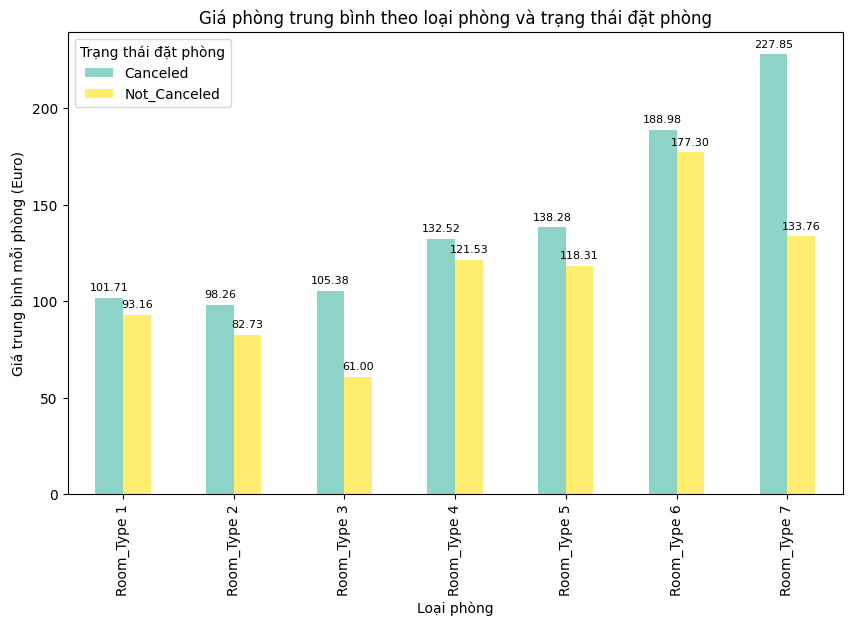

In [ ]:
# Giá phòng trung bình theo loại phòng và trạng thái đặt phòng
avg_price_room = data.groupby(['room_type_reserved', 'booking_status'])['avg_price_per_room'].mean().unstack()
ax = avg_price_room.plot(kind='bar', figsize=(10, 6), colormap='Set3')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Giá phòng trung bình theo loại phòng và trạng thái đặt phòng')
plt.xlabel('Loại phòng')
plt.ylabel('Giá trung bình mỗi phòng (Euro)')
plt.legend(title='Trạng thái đặt phòng')
plt.show()